<a href="https://colab.research.google.com/github/SakshiN02/Python-Projects/blob/main/Customer_Churn_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd

In [2]:
df = pd.read_csv("/content/customer_churn.csv")

In [3]:
df

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,Male,0,Yes,Yes,24,Yes,Yes,DSL,Yes,...,Yes,Yes,Yes,Yes,One year,Yes,Mailed check,84.80,1990.5,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No
7040,4801-JZAZL,Female,0,Yes,Yes,11,No,No phone service,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.60,346.45,No
7041,8361-LTMKD,Male,1,Yes,No,4,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Mailed check,74.40,306.6,Yes


#EDA

In [4]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [5]:
df.columns  #all the columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [6]:
df.describe()  #gives descriptive statistics about the int and float datatype columns

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [7]:
df.describe(include = "all").T # this gives the descriptive statistics of non integer and float columns as well
                               #T here transposes the columns into rows

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
customerID,7043,7043,3186-AJIEK,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
gender,7043,2,Male,3555,NaN,NaN,NaN,NaN,NaN,NaN,NaN
SeniorCitizen,7043.0,NaN,NaN,NaN,0.162147,0.368612,0.0,0.0,0.0,0.0,1.0
Partner,7043,2,No,3641,NaN,NaN,NaN,NaN,NaN,NaN,NaN
Dependents,7043,2,No,4933,NaN,NaN,NaN,NaN,NaN,NaN,NaN
tenure,7043.0,NaN,NaN,NaN,32.371149,24.559481,0.0,9.0,29.0,55.0,72.0
PhoneService,7043,2,Yes,6361,NaN,NaN,NaN,NaN,NaN,NaN,NaN
MultipleLines,7043,3,No,3390,NaN,NaN,NaN,NaN,NaN,NaN,NaN
InternetService,7043,3,Fiber optic,3096,NaN,NaN,NaN,NaN,NaN,NaN,NaN
OnlineSecurity,7043,3,No,3498,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [8]:
df.info()  #basic info about the columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [9]:
df.isna().sum() #cross  checking the null values

,0
customerID,0
gender,0
SeniorCitizen,0
Partner,0
Dependents,0
tenure,0
PhoneService,0
MultipleLines,0
InternetService,0
OnlineSecurity,0


In [10]:
df.nunique() #checking the unique values

,0
customerID,7043
gender,2
SeniorCitizen,2
Partner,2
Dependents,2
tenure,73
PhoneService,2
MultipleLines,3
InternetService,3
OnlineSecurity,3


<hr>
Q1. Extract the 5th column & store it in ‘customer_5’
<hr/>

In [11]:
customer_5 = df.loc[:,["Dependents"]]
customer_5 #or we can also do it this way --> customer_5 = df.iloc[:,4]

,Dependents
0,No
1,No
2,No
3,No
4,No
...,...
7038,Yes
7039,Yes
7040,Yes
7041,No


<hr>
Q2.  Extract the 15th column & store it in ‘customer_15’
<hr/>

In [12]:
customer_15 = df.loc[:,["StreamingMovies"]]
customer_15.head()

,StreamingMovies
0,No
1,No
2,No
3,No
4,No


<hr>
Q3. Extract all the male senior citizens whose Payment Method is Electronic check & store the result in ‘senior_male_electronic’
<hr/>

In [13]:
#lets see the unique values of both columns
df["SeniorCitizen"].unique()

array([0, 1])

In [14]:
df["PaymentMethod"].unique() #checking if "Electronic" check is there in PaymentMethod

array(['Electronic check', 'Mailed check', 'Bank transfer (automatic)',
       'Credit card (automatic)'], dtype=object)

In [15]:
senior_male_electronic = df[(df["gender"] == "Male") & (df["SeniorCitizen"] == 1) & (df["PaymentMethod"] == "Electronic check")]
senior_male_electronic

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
20,8779-QRDMV,Male,1,No,No,1,No,No phone service,DSL,No,...,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,39.65,39.65,Yes
55,1658-BYGOY,Male,1,No,No,18,Yes,Yes,Fiber optic,No,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,95.45,1752.55,Yes
57,5067-XJQFU,Male,1,Yes,Yes,66,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,One year,Yes,Electronic check,108.45,7076.35,No
78,0191-ZHSKZ,Male,1,No,No,30,Yes,No,DSL,Yes,...,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,74.75,2111.3,No
91,2424-WVHPL,Male,1,No,No,1,Yes,No,Fiber optic,No,...,No,Yes,No,No,Month-to-month,No,Electronic check,74.70,74.7,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6837,6229-LSCKB,Male,1,No,No,6,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,79.70,497.6,No
6894,1400-MMYXY,Male,1,Yes,No,3,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,105.90,334.65,Yes
6914,7142-HVGBG,Male,1,Yes,No,43,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.00,4414.3,Yes
6967,8739-WWKDU,Male,1,No,No,25,Yes,Yes,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,89.50,2196.15,Yes


<hr>
Q4. Extract all those customers whose tenure is greater than 70 months or their Monthly charges is more than 100$ & store the result in ‘customer_total_tenure’
<hr/>

In [16]:
df["MonthlyCharges"].unique() #checking the unique values of MonthlyCharges

array([29.85, 56.95, 53.85, ..., 63.1 , 44.2 , 78.7 ])

In [17]:
df["tenure"].unique() #checking the unique values of tenure

array([ 1, 34,  2, 45,  8, 22, 10, 28, 62, 13, 16, 58, 49, 25, 69, 52, 71,
       21, 12, 30, 47, 72, 17, 27,  5, 46, 11, 70, 63, 43, 15, 60, 18, 66,
        9,  3, 31, 50, 64, 56,  7, 42, 35, 48, 29, 65, 38, 68, 32, 55, 37,
       36, 41,  6,  4, 33, 67, 23, 57, 61, 14, 20, 53, 40, 59, 24, 44, 19,
       54, 51, 26,  0, 39])

In [18]:
customer_total_tenure = df[(df["tenure"] > 70) | (df["MonthlyCharges"] > 100)]
customer_total_tenure

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
8,7892-POOKP,Female,0,Yes,No,28,Yes,Yes,Fiber optic,No,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,104.80,3046.05,Yes
12,8091-TTVAX,Male,0,Yes,No,58,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,No,Credit card (automatic),100.35,5681.1,No
13,0280-XJGEX,Male,0,No,No,49,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Bank transfer (automatic),103.70,5036.3,Yes
14,5129-JLPIS,Male,0,No,No,25,Yes,No,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,105.50,2686.05,No
15,3655-SNQYZ,Female,0,Yes,Yes,69,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Credit card (automatic),113.25,7895.15,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7023,1035-IPQPU,Female,1,Yes,No,63,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,Yes,Electronic check,103.50,6479.4,No
7034,0639-TSIQW,Female,0,No,No,67,Yes,Yes,Fiber optic,Yes,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),102.95,6886.25,Yes
7037,2569-WGERO,Female,0,No,No,72,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Bank transfer (automatic),21.15,1419.4,No
7039,2234-XADUH,Female,0,Yes,Yes,72,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,One year,Yes,Credit card (automatic),103.20,7362.9,No


<hr>
Q5.Extract all the customers whose Contract is of two years, payment method is Mailed check & the value of Churn is ‘Yes’ & store the result in ‘two_mail_yes’
<hr/>

In [19]:
df["Contract"].unique() #checking the unique values of this column

array(['Month-to-month', 'One year', 'Two year'], dtype=object)

In [20]:
df.columns

Index(['customerID', 'gender', 'SeniorCitizen', 'Partner', 'Dependents',
       'tenure', 'PhoneService', 'MultipleLines', 'InternetService',
       'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 'TechSupport',
       'StreamingTV', 'StreamingMovies', 'Contract', 'PaperlessBilling',
       'PaymentMethod', 'MonthlyCharges', 'TotalCharges', 'Churn'],
      dtype='object')

In [21]:
df["Churn"].unique() #checking the unique values of this column

array(['No', 'Yes'], dtype=object)

In [22]:
two_mail_yes = df[(df["Contract"] == 'Two year') & (df["PaymentMethod"] == 'Mailed check') & (df["Churn"] ==  'Yes')]
two_mail_yes

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
268,6323-AYBRX,Male,0,No,No,59,Yes,No,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,19.35,1099.6,Yes
5947,7951-QKZPL,Female,0,Yes,Yes,33,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Mailed check,24.50,740.3,Yes
6680,9412-ARGBX,Female,0,No,Yes,48,Yes,No,Fiber optic,No,...,Yes,Yes,Yes,No,Two year,Yes,Mailed check,95.50,4627.85,Yes


<hr>
Q6. Extract 333 random records from the customer_churn dataframe & store the result in ‘customer_333’
<hr/>

In [23]:
customer_333 = df.sample(n = 333)
customer_333

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
4161,4223-WOZCM,Male,1,No,No,2,Yes,No,DSL,No,...,Yes,No,No,No,Month-to-month,No,Mailed check,49.95,107.1,No
6934,6257-DTAYD,Male,0,Yes,No,71,Yes,Yes,Fiber optic,No,...,No,Yes,Yes,Yes,Two year,Yes,Credit card (automatic),104.15,7365.3,No
3244,7966-YOTQW,Male,0,No,No,10,Yes,Yes,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Credit card (automatic),54.50,568.2,No
1405,6960-HVYXR,Female,0,No,No,1,Yes,Yes,Fiber optic,No,...,No,No,No,No,Month-to-month,No,Electronic check,76.00,76,Yes
2317,6770-UAYGJ,Female,0,Yes,Yes,49,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Mailed check,25.25,1211.65,No
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1022,8242-SOQUO,Female,1,No,No,5,Yes,No,Fiber optic,No,...,No,No,Yes,No,Month-to-month,Yes,Electronic check,84.70,392.5,No
4456,1619-YWUBB,Female,0,Yes,No,68,Yes,Yes,No,No internet service,...,No internet service,No internet service,No internet service,No internet service,Two year,Yes,Credit card (automatic),24.95,1614.9,No
3894,5989-AXPUC,Female,0,Yes,No,68,Yes,Yes,Fiber optic,Yes,...,Yes,Yes,Yes,Yes,Two year,No,Mailed check,118.60,7990.05,No
4867,0899-LIIBW,Male,0,Yes,No,34,Yes,Yes,Fiber optic,No,...,Yes,No,Yes,Yes,Month-to-month,No,Electronic check,100.85,3527.3,No


<hr>
Q7. Get the count of different levels from the ‘Churn’ column
<hr/>

In [24]:
df["Churn"].unique()  #or

array(['No', 'Yes'], dtype=object)

In [25]:
df["Churn"].value_counts()

,count
Churn,
No,5174
Yes,1869


#DATA VISUALIZATIONS

In [26]:
#importing the necessary librabries
import matplotlib.pyplot as plt
import seaborn as sns


#Churn Rate by Contract Type 📜

<ipython-input-80-ad620a92e5fa>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=df["Contract"], y=df["Churn"].replace({"Yes": 1, "No": 0}), palette="coolwarm")


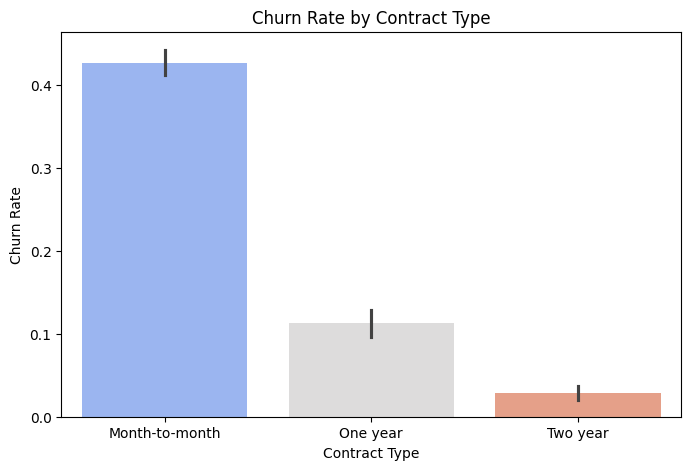

In [80]:

import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,5))
sns.barplot(x=df["Contract"], y=df["Churn"].replace({"Yes": 1, "No": 0}), palette="coolwarm")
plt.title("Churn Rate by Contract Type")
plt.ylabel("Churn Rate")
plt.xlabel("Contract Type")
plt.show()


<ipython-input-27-ec89d4aecbb4>:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=index, y=df["InternetService"].value_counts(), palette="deep")


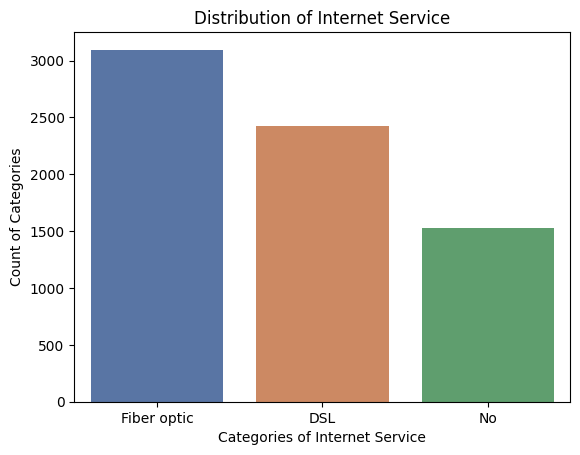

In [27]:
# Create a categorical index for the x-axis
index = df["InternetService"].value_counts().index

# Create the bar plot
sns.barplot(x=index, y=df["InternetService"].value_counts(), palette="deep")

plt.xlabel("Categories of Internet Service")
plt.ylabel("Count of Categories")
plt.title("Distribution of Internet Service")
plt.show()

#Churn Distribution Visualization
📝 Code to visualize (Bar Chart & Pie Chart)

<ipython-input-81-40381dd983bf>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["Churn"], palette=["#1f77b4", "#ff7f0e"])


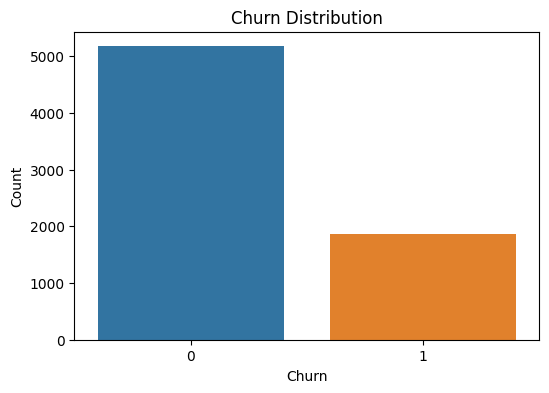

In [81]:
#Bar Chart – Churn Count
plt.figure(figsize=(6,4))
sns.countplot(x=df["Churn"], palette=["#1f77b4", "#ff7f0e"])
plt.title("Churn Distribution")
plt.xlabel("Churn")
plt.ylabel("Count")
plt.show()


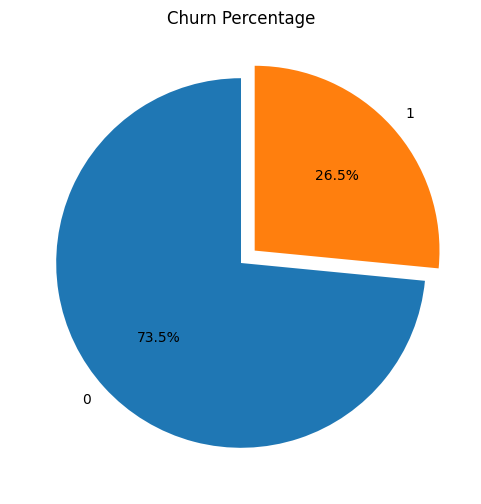

In [82]:
#Pie Chart – Churn Percentage
plt.figure(figsize=(6,6))
df["Churn"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#1f77b4", "#ff7f0e"], startangle=90, explode=[0, 0.1])
plt.title("Churn Percentage")
plt.ylabel("")  # Hide the y-label
plt.show()


<hr>
 Building a histogram for the ‘tenure’ column:

i. Set the number of bins to be 30

ii. Set the color of the bins to be ‘green’

iii. Assign the title ‘Distribution of tenure’
<hr/>

Text(0.5, 1.0, 'Distribution of tenure')

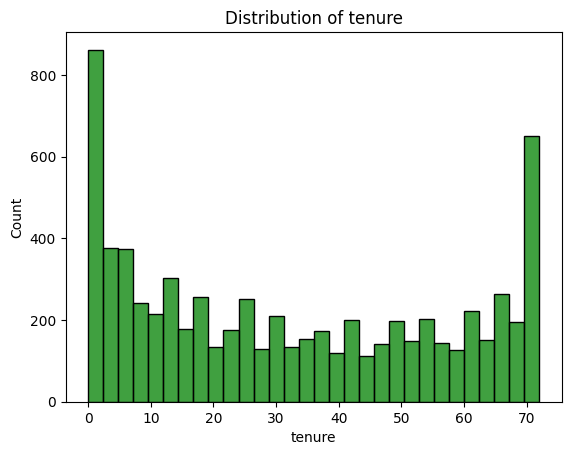

In [28]:
sns.histplot(data = df["tenure"] , bins = 30 , color = "green")
plt.title("Distribution of tenure")

<hr>
 Build a scatter-plot between ‘MonthlyCharges’ & ‘tenure’. Map ‘MonthlyCharges’ to the y-axis & ‘tenure’ to the ‘x-axis’:

i. Assign the points a color of ‘brown’.

ii. Set the x-axis label to ‘Tenure of customer’.

iii. Set the y-axis label to ‘Monthly Charges of customer’.

iv. Set the title to ‘Tenure vs Monthly Charges'
<hr/>

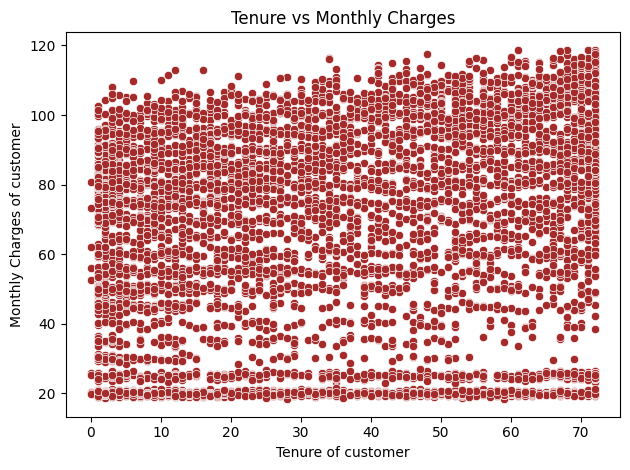

In [29]:
sns.scatterplot(x = df["tenure"], y = df["MonthlyCharges"] , data = df, color = "brown" )
plt.xlabel("Tenure of customer")
plt.ylabel("Monthly Charges of customer")
plt.title("Tenure vs Monthly Charges")
plt.tight_layout()
plt.show()

<hr>
Build a box-plot between ‘tenure’ & ‘Contract’. Map ‘tenure’ on the y-axis & ‘Contract’ on the x-axis.
<hr/>

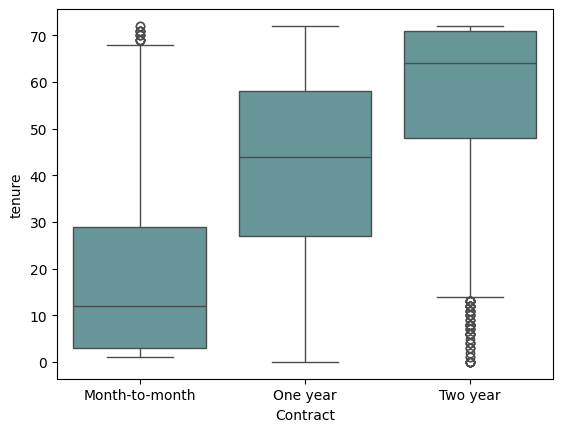

In [30]:
sns.boxplot(data = df , x = df["Contract"], y = df["tenure"] , color= "cadetblue")
plt.show()

 # Bar Chart – Payment Method Distribution

<ipython-input-83-6e11117a6f3d>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df["PaymentMethod"], palette="coolwarm")


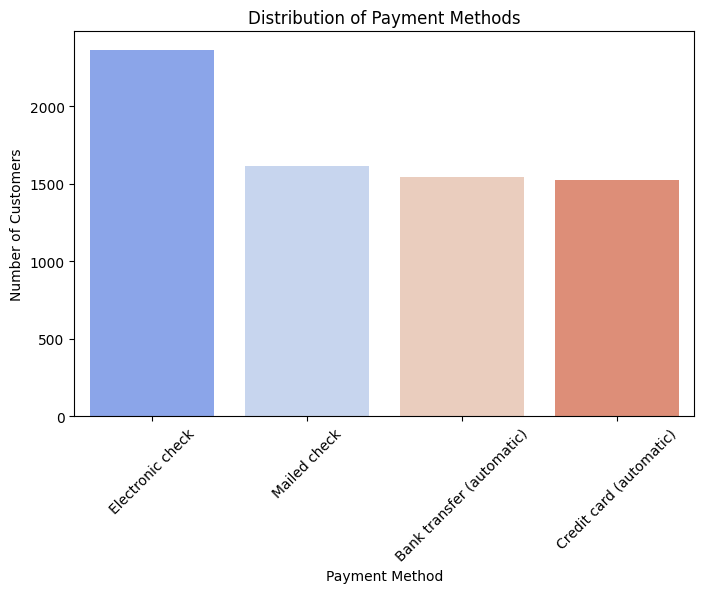

In [83]:

plt.figure(figsize=(8,5))
sns.countplot(x=df["PaymentMethod"], palette="coolwarm")
plt.xticks(rotation=45)
plt.title("Distribution of Payment Methods")
plt.xlabel("Payment Method")
plt.ylabel("Number of Customers")
plt.show()


# Pie Chart – Payment Method Proportion

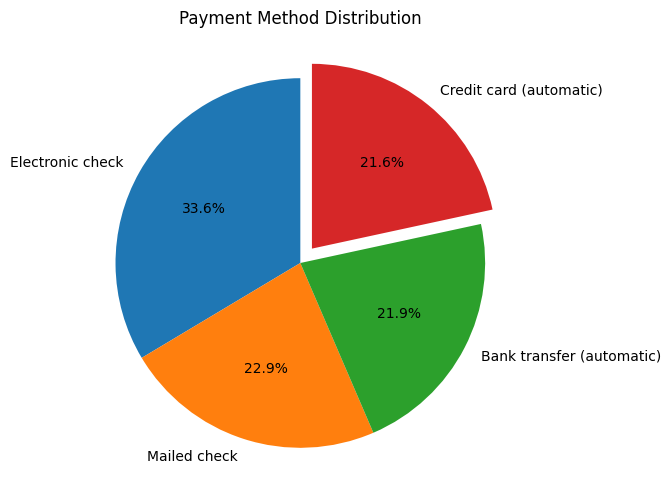

In [84]:
plt.figure(figsize=(6,6))
df["PaymentMethod"].value_counts().plot.pie(autopct="%1.1f%%", colors=["#1f77b4", "#ff7f0e", "#2ca02c", "#d62728"], startangle=90, explode=[0, 0, 0, 0.1])
plt.title("Payment Method Distribution")
plt.ylabel("")  # Hide the y-label
plt.show()


# Histogram – Monthly Charges Distribution


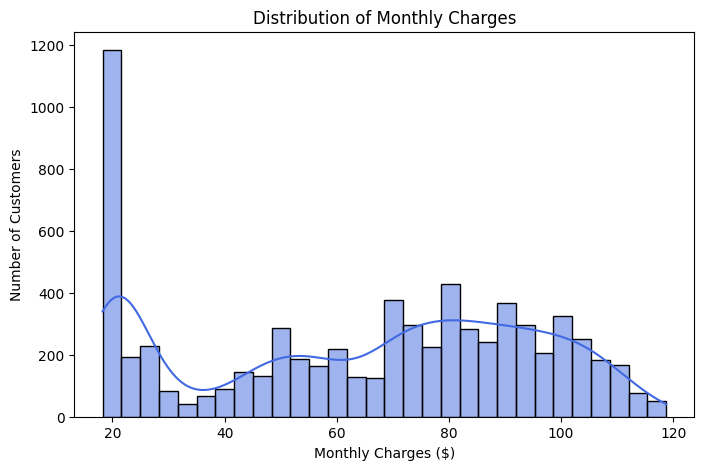

In [85]:
plt.figure(figsize=(8,5))
sns.histplot(df["MonthlyCharges"], bins=30, kde=True, color="royalblue")
plt.title("Distribution of Monthly Charges")
plt.xlabel("Monthly Charges ($)")
plt.ylabel("Number of Customers")
plt.show()



#MODEL BUILDING

<hr>
Linear Regression:

a. Build a simple linear model where dependent variable is ‘MonthlyCharges’ and independent variable is ‘tenure’

i. Divide the dataset into train and test sets in 70:30 ratio.

ii. Build the model on train set and predict the values on test set

iii. After predicting the values, find the root mean square error

iv. Find out the error in prediction & store the result in ‘error’

v. Find the root mean square error
<hr/>

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
#y = mx+c y = mx1+mx2+...+c -->linear regression formula

In [32]:
 x = df.loc[:,["tenure"]].values
 x

array([[ 1],
       [34],
       [ 2],
       ...,
       [11],
       [ 4],
       [66]])

In [33]:
y = df.loc[:,["MonthlyCharges"]].values
y

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [34]:
#i. Divide the dataset into train and test sets in 70:30 ratio.
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size= 0.3, random_state = 0)

In [35]:
x_train

array([[ 9],
       [14],
       [64],
       ...,
       [58],
       [ 1],
       [ 4]])

In [36]:
x_test

array([[19],
       [60],
       [13],
       ...,
       [69],
       [52],
       [35]])

In [37]:
y_train

array([[72.9 ],
       [82.65],
       [47.85],
       ...,
       [20.75],
       [69.75],
       [20.4 ]])

In [38]:
y_test

array([[ 58.2 ],
       [116.6 ],
       [ 71.95],
       ...,
       [109.95],
       [ 24.55],
       [ 81.6 ]])

In [39]:
#fitting the model
model = LinearRegression()
model.fit(x_train,y_train )

LinearRegression()

In [40]:
#ii. Build the model on train set and predict the values on test set
y_pred = model.predict(x_test)
y_pred

array([[60.95089608],
       [72.98096699],
       [59.1903979 ],
       ...,
       [75.62171426],
       [70.63363608],
       [65.6455579 ]])

In [41]:
#iii. After predicting the values, find the root mean square error
from sklearn.metrics import r2_score
rmse = r2_score(y_test,y_pred)
print("the root mean square error is :",rmse)

the root mean square error is : 0.069470028128085


In [42]:
#iv. Find out the error in prediction & store the result in ‘error’

import numpy as np
error = np.mean((y_pred - y_test) ** 2)

In [43]:
print("Mean Squared Error (MSE): ", error)

Mean Squared Error (MSE):  864.0415701364655


<hr>
Logistic Regression:

a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’.

i. Divide the dataset in 65:35 ratio

ii. Build the model on train set and predict the values on test set

iii. Build the confusion matrix and get the accuracy score
<hr/>

In [44]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [45]:
#a. Build a simple logistic regression modelwhere dependent variable is ‘Churn’ & independent variable is ‘MonthlyCharges’.
x = df.loc[:,["MonthlyCharges"]].values
y = df.loc[:,["Churn"]].values

In [46]:
x

array([[ 29.85],
       [ 56.95],
       [ 53.85],
       ...,
       [ 29.6 ],
       [ 74.4 ],
       [105.65]])

In [47]:
y

array([['No'],
       ['No'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [48]:
#i. Divide the dataset in 65:35 ratio
x_train , x_test, y_train, y_test = train_test_split(x, y, test_size = 0.35, random_state = 0)

In [49]:
x_train

array([[95.65],
       [85.25],
       [75.  ],
       ...,
       [20.75],
       [69.75],
       [20.4 ]])

In [50]:
x_test

array([[ 58.2 ],
       [116.6 ],
       [ 71.95],
       ...,
       [ 93.55],
       [ 20.65],
       [107.2 ]])

In [51]:
y_train

array([['No'],
       ['Yes'],
       ['Yes'],
       ...,
       ['No'],
       ['Yes'],
       ['No']], dtype=object)

In [52]:
y_test

array([['No'],
       ['No'],
       ['No'],
       ...,
       ['Yes'],
       ['No'],
       ['No']], dtype=object)

In [53]:
#ii. Build the model on train set and predict the values on test set
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

#predicting the values on test set
y_pred = log_reg.predict(x_test)
y_pred

/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


array(['No', 'No', 'No', ..., 'No', 'No', 'No'], dtype=object)

In [54]:
#iii. Build the confusion matrix and get the accuracy score
from sklearn.metrics import confusion_matrix,accuracy_score,ConfusionMatrixDisplay


In [55]:
#confusion matrix
conf_mat = confusion_matrix(y_test,y_pred)
print(conf_mat)

[[1815    0]
 [ 651    0]]


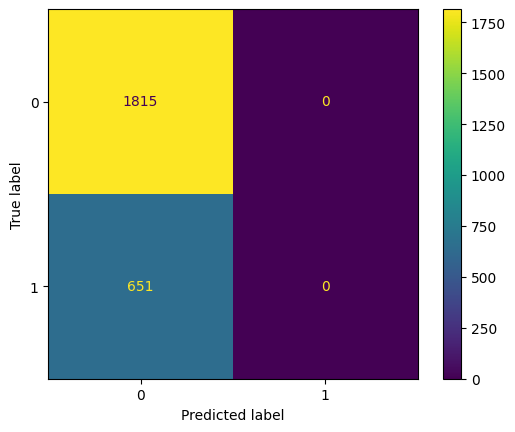

In [56]:
#visualizing the confusion matrix
ConfusionMatrixDisplay(confusion_matrix=conf_mat,).plot()
plt.show()

In [57]:
#accuracy score
acc_score = accuracy_score(y_test,y_pred)
print("The accuracy score of our model is {}".format(acc_score*100))

The accuracy score of our model is 73.60097323600974


<h2>
KEY INSIGHTS:

<h3>Linear Regression:<h3/>

The root mean square error is : 0.069470028128085

Mean Squared Error (MSE):  864.0415701364655

<h3>Logistic Regression:<h3/>

The accuracy score of our model is 73.60097323600974

The confusion matrix is [[1815    0]
                         [ 651    0]]

<h2/>

In [58]:
#Preprocess the Data
# Convert 'Churn' to a binary variable if it's not already
df['Churn'] = df['Churn'].map({'Yes': 1, 'No': 0})  # Assuming 'Churn' is categorical


In [59]:
# Select relevant features
X = df[['tenure', 'MonthlyCharges']]
y = df['Churn']


In [60]:
#dropping the null values
df["TotalCharges"] = df.dropna(subset=['TotalCharges'], inplace=True)

In [61]:
# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [62]:
#Build the Logistic Regression Model
model = LogisticRegression()
model.fit(X_train, y_train)


LogisticRegression()

In [63]:
#Make Predictions
y_pred = model.predict(X_test)

In [64]:
# Evaluate the Model
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)


Accuracy: 0.80


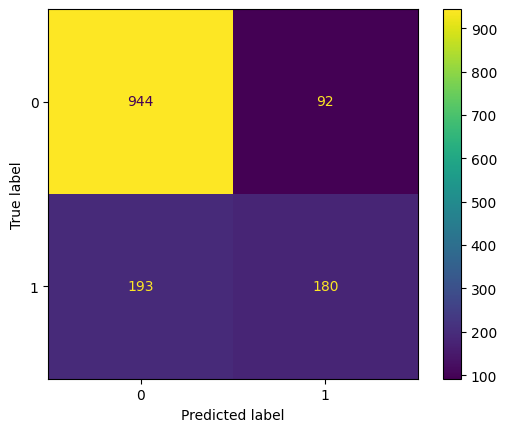

In [65]:
# Display confusion matrix and accuracy
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
cmd.plot()
print(f'Accuracy: {accuracy:.2f}')

<h2>
DECISION TREE
</h2>

In [66]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay



In [67]:
X = df[['tenure']]
y = df['Churn']

In [68]:
#  Split the Data into 80:20 ratio
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In [69]:
X_train

,tenure
2142,21
1623,54
6074,1
1362,4
6754,0
...,...
3772,1
5191,23
5226,12
5390,12


In [70]:
X_test

,tenure
185,1
2715,41
3825,52
1807,1
132,67
...,...
6366,64
315,51
2439,17
5002,69


In [71]:
y_train

,Churn
2142,0
1623,0
6074,1
1362,1
6754,0
...,...
3772,1
5191,0
5226,0
5390,1


In [72]:
y_test

,Churn
185,1
2715,0
3825,0
1807,1
132,0
...,...
6366,0
315,0
2439,0
5002,0


In [73]:

#  Build the Decision Tree Model
dt = DecisionTreeClassifier(random_state=42)
dt.fit(X_train, y_train)

DecisionTreeClassifier(random_state=42)

Accuracy: 0.76


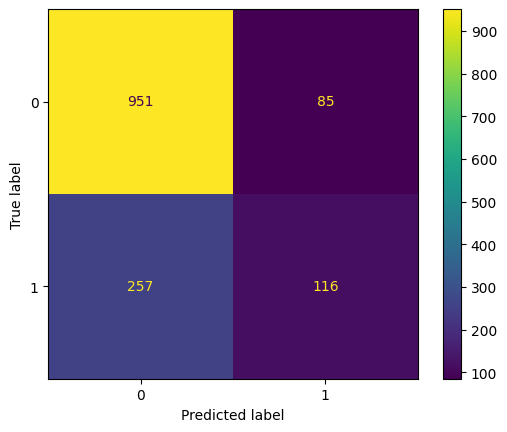

In [74]:
y_pred = dt.predict(X_test)
y_pred

#  Build the Confusion Matrix and Get the Accuracy Score
cm = confusion_matrix(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)

#  Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=dt.classes_)
cmd.plot()
print(f'Accuracy: {accuracy:.2f}')

<h2>
RANDOM FOREST CLASSIFIER
</h2>

In [75]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, ConfusionMatrixDisplay


In [76]:
X = df[['tenure', 'MonthlyCharges']]
Y = df['Churn']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.3, random_state=42)

In [77]:
rf = RandomForestClassifier(n_estimators=100, random_state=42)
rf.fit(X_train,Y_train)

RandomForestClassifier(random_state=42)

In [78]:
# Make predictions on the test set
Y_pred = rf.predict(X_test)

Accuracy: 0.76


<Figure size 800x600 with 0 Axes>

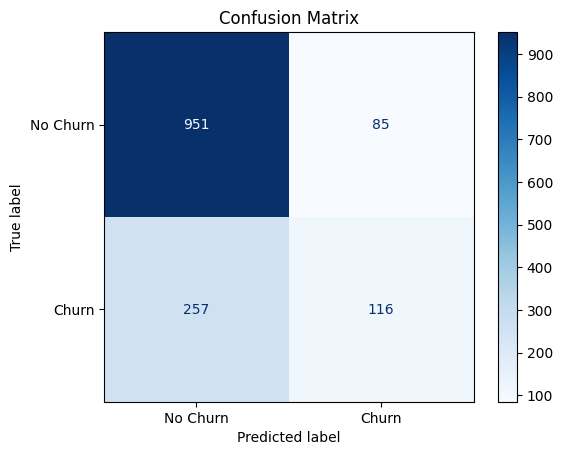

In [79]:
# Create the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)

# Print accuracy
print(f'Accuracy: {accuracy:.2f}')

# Display the confusion matrix
cmd = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=['No Churn', 'Churn'])
plt.figure(figsize=(8, 6))
cmd.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()